In [1]:
import json
import string
import jiwer as ji
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Section1: Data Loading

This section is used for pre-processing the dataset.

### 1. DeepSpeech (with optimised alpha beta)

In [2]:
deepspeech_train = pd.DataFrame()
deepspeech_dev = pd.DataFrame()
deepspeech_test = pd.DataFrame()

In [3]:
with open('deepspeech_train.txt', 'r', encoding='utf-8') as file_read:
    data = file_read.read()
    loaded_json = json.loads(data)
    deepspeech_train = pd.DataFrame.from_dict(loaded_json)

with open('deepspeech_dev.txt', 'r', encoding='utf-8') as file_read:
    data = file_read.read()
    loaded_json = json.loads(data)
    deepspeech_dev = pd.DataFrame.from_dict(loaded_json)
    
with open('deepspeech_test.txt', 'r', encoding='utf-8') as file_read:
    data = file_read.read()
    loaded_json = json.loads(data)
    deepspeech_test = pd.DataFrame.from_dict(loaded_json)    

In [4]:
def replacePath(x):
    return x.split("/media/data/LTLab.lan/agarwal/german-speech-corpus/swiss_german/splits_mathias/clips/")[1]

def replacePath2(x):
    return x.split(".wav")[0]

deepspeech_train['wav_filename'] = deepspeech_train['wav_filename'].apply(replacePath)
deepspeech_dev['wav_filename'] = deepspeech_dev['wav_filename'].apply(replacePath)
deepspeech_test['wav_filename'] = deepspeech_test['wav_filename'].apply(replacePath)

deepspeech_train['wav_filename'] = deepspeech_train['wav_filename'].apply(replacePath2)
deepspeech_dev['wav_filename'] = deepspeech_dev['wav_filename'].apply(replacePath2)
deepspeech_test['wav_filename'] = deepspeech_test['wav_filename'].apply(replacePath2)

In [5]:
deepspeech_train['length_ratio'] = deepspeech_train['res'].str.len()/deepspeech_train['src'].str.len()
deepspeech_dev['length_ratio'] = deepspeech_dev['res'].str.len()/deepspeech_dev['src'].str.len()
deepspeech_test['length_ratio'] = deepspeech_test['res'].str.len()/deepspeech_test['src'].str.len()

In [6]:
deepspeech_train = deepspeech_train[['wav_filename', 'src', 'res', 'wer', 'length_ratio']]
deepspeech_train = deepspeech_train.sort_values('wav_filename',ascending=True)
deepspeech_train = deepspeech_train.rename(columns={'res': 'res_dp', 'wer': 'wer_dp', 'length_ratio': 'length_ratio_dp'})
deepspeech_train = deepspeech_train.reset_index(drop=True) 
#deepspeech_train.set_index('wav_filename')

deepspeech_dev = deepspeech_dev[['wav_filename', 'src', 'res', 'wer', 'length_ratio']]
deepspeech_dev = deepspeech_dev.sort_values('wav_filename',ascending=True)
deepspeech_dev = deepspeech_dev.rename(columns={'res': 'res_dp', 'wer': 'wer_dp', 'length_ratio': 'length_ratio_dp'})
deepspeech_dev = deepspeech_dev.reset_index(drop=True) 
#deepspeech_dev.set_index('wav_filename')

deepspeech_test = deepspeech_test[['wav_filename', 'src', 'res', 'wer', 'length_ratio']]
deepspeech_test = deepspeech_test.sort_values('wav_filename',ascending=True)
deepspeech_test = deepspeech_test.rename(columns={'res': 'res_dp', 'wer': 'wer_dp', 'length_ratio': 'length_ratio_dp'})
deepspeech_test = deepspeech_test.reset_index(drop=True) 
#deepspeech_test.set_index('wav_filename')

In [7]:
deepspeech_test.head()

,wav_filename,src,res_dp,wer_dp,length_ratio_dp
0,10090,aber ich habe etwas mühe für die bdp zu sprech...,ein bis er die bdp zu sprechen es gleich in,0.705882,0.511905
1,10091,wir unterstützen die motion sie geht in die ri...,wir unterstützen die motion unterstützen die m...,0.500000,1.180328
2,10092,die antwort des regierungsrats ist eben leider...,die antwort des rates die leider als,0.500000,0.679245
3,10093,es geht nicht um eine doppelte bestrafung der ...,ich eine doppelte bestrafen der taxifahrer ein...,0.714286,0.593407
4,10094,der taxifahrer der vielleicht einmal zu schnel...,der taxifahrer der eichel gefahr gibt den bus ...,0.666667,0.692308


### 2. Jasper

In [8]:
jasper_train = pd.DataFrame()
jasper_dev = pd.DataFrame()
jasper_test = pd.DataFrame()

In [9]:
data = []
with open('jasper_train.txt') as f:
    for row_num, line in enumerate(f):
        if line is not '\n':
            try:
                wav_filename = line.split('#')[0].rstrip('\t')
                res = line.split('#')[1].strip('\n').strip('\t').replace("\t", " ")
                match = deepspeech_train[deepspeech_train['wav_filename'].str.match(wav_filename)]
                src = match['src'].iloc[0]
                wer = ji.wer(src, res)
                length_ratio = len(res)/len(src)
                data.append([wav_filename, res, src, wer, length_ratio])
            except:
                print(wav_filename)
jasper_train = pd.DataFrame(data = data, columns = ['wav_filename', 'res_js', 'src', 'wer_js', 'length_ratio_js'])

30492
30461


In [10]:
data = []
with open('jasper_dev.txt') as f:
    for row_num, line in enumerate(f):
        if line is not '\n':
            try:
                wav_filename = line.split('#')[0].rstrip('\t')
                res = line.split('#')[1].strip('\n').strip('\t').replace("\t", " ")
                match = deepspeech_dev[deepspeech_dev['wav_filename'].str.match(wav_filename)]
                src = match['src'].iloc[0]
                wer = ji.wer(src, res)
                length_ratio = len(res)/len(src)
                data.append([wav_filename, res, src, wer, length_ratio])
            except:
                print(wav_filename)
jasper_dev = pd.DataFrame(data = data, columns = ['wav_filename', 'res_js', 'src', 'wer_js', 'length_ratio_js'])

25673
31921
6736
16961
23297
26886
32640
15283
15887
16978
22522
12508
6732
9743


In [11]:
data = []
with open('jasper_test.txt') as f:
    for row_num, line in enumerate(f):
        if line is not '\n':
            try:
                wav_filename = line.split('#')[0].rstrip('\t')
                res = line.split('#')[1].strip('\n').strip('\t').replace("\t", " ")
                match = deepspeech_test[deepspeech_test['wav_filename'].str.match(wav_filename)]
                src = match['src'].iloc[0]
                wer = ji.wer(src, res)
                length_ratio = len(res)/len(src)
                data.append([wav_filename, res, src, wer, length_ratio])
            except:
                print(wav_filename)
jasper_test = pd.DataFrame(data = data, columns = ['wav_filename', 'res_js', 'src', 'wer_js', 'length_ratio_js'])

29472
3319
30907
1526
17699
23046
10994
29547
14885
22438
29979
13995
21704
19806
29470


In [12]:
jasper_train = jasper_train[['wav_filename', 'src', 'res_js', 'wer_js', 'length_ratio_js']]
jasper_train = jasper_train.sort_values('wav_filename',ascending=True)
jasper_train = jasper_train.reset_index(drop=True)
#jasper_train = jasper_train.set_index('wav_filename')

jasper_dev = jasper_dev[['wav_filename', 'src', 'res_js', 'wer_js', 'length_ratio_js']]
jasper_dev = jasper_dev.sort_values('wav_filename',ascending=True)
jasper_dev = jasper_dev.reset_index(drop=True)
#jasper_dev = jasper_dev.set_index('wav_filename')

jasper_test = jasper_test[['wav_filename', 'src', 'res_js', 'wer_js', 'length_ratio_js']]
jasper_test = jasper_test.sort_values('wav_filename',ascending=True)
jasper_test = jasper_test.reset_index(drop=True)
#jasper_test = jasper_test.set_index('wav_filename')

In [13]:
# skip above steps and directly read pre-processed files
jasper_train.to_csv("jasper_train1.csv", index=False)
jasper_dev.to_csv("jasper_dev1.csv", index=False)
jasper_test.to_csv("jasper_test1.csv", index=False)

In [ ]:
# skip above steps and directly read pre-processed files
jasper_train = pd.read_csv("jasper_train1.csv")
jasper_dev = pd.read_csv("jasper_dev1.csv")
jasper_test = pd.read_csv("jasper_test1.csv")

### 3. Kaldi

In [15]:
kaldi = pd.read_csv('kaldi_test.csv', encoding='utf-8')

In [16]:
def updatePath(path):
    return path.split("-")[1].split('.')[0]

kaldi["wav_filename"] = kaldi["wav_filename"].apply(updatePath)

In [17]:
wer = []
data = []
length_ratio = []
for index, row in kaldi.iterrows():
    try:
        wav_filename = row['wav_filename']
        res = row['res']
        match = deepspeech_test[deepspeech_test['wav_filename'].str.match(wav_filename)]
        src = match['src'].iloc[0]
        wer = round(ji.wer(src, res)*100,2)
        length_ratio = len(res)/len(src)
        data.append([wav_filename, res, src, wer, length_ratio])
    except:
        print(wav_filename)
kaldi_test = pd.DataFrame(data = data, columns = ['wav_filename', 'res_kd', 'src', 'wer_kd', 'length_ratio_kd'])

21704
1526
17699
14885
29470
29472
29547
30907
13995
22438
10994
19806
23046
29979
3319


In [18]:
kaldi_test = kaldi_test[['wav_filename', 'src', 'res_kd', 'wer_kd', 'length_ratio_kd']]
kaldi_test = kaldi_test.sort_values('wav_filename',ascending=True)
kaldi_test = kaldi_test.reset_index(drop=True) 
#kaldi_test = kaldi_test.set_index('wav_filename')

In [19]:
# skip above steps and directly read pre-processed files
kaldi_test.to_csv("kaldi_test1.csv", index = False)

In [20]:
# skip above steps and directly read pre-processed files
kaldi_test = pd.read_csv("kaldi_test1.csv")

In [21]:
kaldi_test.head()

,wav_filename,src,res_kd,wer_kd,length_ratio_kd
0,10090,aber ich habe etwas mühe für die bdp zu sprech...,für die bdp einzelsprechern mag gleich,82.35,0.452381
1,10091,wir unterstützen die motion sie geht in die ri...,wir unterstützen diese motion unterstützen die...,40.00,1.393443
2,10092,die antwort des regierungsrats ist eben leider...,die antwort des regierungsrats ist leider falsch,12.50,0.905660
3,10093,es geht nicht um eine doppelte bestrafung der ...,es geht nicht um einen doppelten bestrafung de...,50.00,0.857143
4,10094,der taxifahrer der vielleicht einmal zu schnel...,der taxifahrer der vielleicht einmal zu schnel...,36.67,0.895928


### 4. Private Test Data

In [22]:
grndthruth_test_pri = pd.read_csv('test_public_ground_truth.csv')
grndthruth_test_pri['sentence'] = grndthruth_test_pri.sentence.str.replace('[^\w\s]','')
grndthruth_test_pri = grndthruth_test_pri.rename(columns={'path': 'wav_filename', 'sentence': 'src'})
grndthruth_test_pri = grndthruth_test_pri.set_index('wav_filename')

fhnw_test_pri = pd.read_csv('test_public_submission_fhnw.csv')
fhnw_test_pri = fhnw_test_pri.rename(columns={'path': 'wav_filename', 'sentence': 'res_fhnw'})
fhnw_test_pri = fhnw_test_pri.set_index('wav_filename')

ude_test_pri = pd.read_csv('test_public_submission_ude.csv')
ude_test_pri = ude_test_pri.rename(columns={'path': 'wav_filename', 'sentence': 'res_ude'})
ude_test_pri = ude_test_pri.set_index('wav_filename')

uzh_test_pri = pd.read_csv('test_public_submission_uzh.csv')
uzh_test_pri = uzh_test_pri.rename(columns={'path': 'wav_filename', 'sentence': 'res_uzh'})
uzh_test_pri = uzh_test_pri.set_index('wav_filename')

zhaw_test_pri = pd.read_csv('test_public_submission_zhaw.csv')
zhaw_test_pri = zhaw_test_pri.rename(columns={'path': 'wav_filename', 'sentence': 'res_zhaw'})
zhaw_test_pri = zhaw_test_pri.set_index('wav_filename')

In [23]:
combined_test_pri = pd.concat([grndthruth_test_pri, fhnw_test_pri, ude_test_pri, uzh_test_pri, zhaw_test_pri], axis=1)
combined_test_pri.loc[:,~combined_test_pri.columns.duplicated()]

combined_test_pri = combined_test_pri.dropna()

In [24]:
wer = []
length_ratio = []
for index, row in combined_test_pri.iterrows():
    wer.append(round(ji.wer(row['src'], row['res_fhnw'])*100,2))
    length_ratio.append(len(row['res_fhnw'])/len(row['src']))
combined_test_pri['res_fhnw_wer'] = wer
combined_test_pri['length_ratio_fhnw'] = length_ratio
    
wer = []
length_ratio = []
for index, row in combined_test_pri.iterrows():
    wer.append(round(ji.wer(row['src'], row['res_ude'])*100,2))
    length_ratio.append(len(row['res_ude'])/len(row['src']))                                    
combined_test_pri['res_ude_wer'] = wer
combined_test_pri['length_ratio_ude'] = length_ratio
    
wer = []
length_ratio = []
for index, row in combined_test_pri.iterrows():
    wer.append(round(ji.wer(row['src'], row['res_uzh'])*100,2))
    length_ratio.append(len(row['res_uzh'])/len(row['src']))
combined_test_pri['res_uzh_wer'] = wer
combined_test_pri['length_ratio_uzh'] = length_ratio
    
wer = []
length_ratio = []
for index, row in combined_test_pri.iterrows():
    wer.append(round(ji.wer(row['src'], row['res_zhaw'])*100,2))
    length_ratio.append(len(row['res_zhaw'])/len(row['src']))   
combined_test_pri['res_zhaw_wer'] = wer
combined_test_pri['length_ratio_zhaw'] = length_ratio

In [25]:
combined_test_pri

,src,res_fhnw,res_ude,res_uzh,res_zhaw,res_fhnw_wer,length_ratio_fhnw,res_ude_wer,length_ratio_ude,res_uzh_wer,length_ratio_uzh,res_zhaw_wer,length_ratio_zhaw
wav_filename,,,,,,,,,,,,,
15.flac,vielen dank für diese grosse arbeit im dienste...,für die grosse arbeit im dienst unseres kantons,für die grosse arbeit im dienste kanton,für die grosse arbeit im dienste in unserem ka...,für die grosse arbeit im dienst unseres kantons,40.00,0.758065,50.00,0.629032,60.00,0.806452,40.00,0.758065
16.flac,und vielen dank an dieser stelle auch für die ...,wir sind an dieser stelle auch für die gesamme...,dieser stelle für die gesammelten werke der ge...,an dieser stelle auch für die gesammelten werk...,nach sind an dieser stelle auch für die gesamm...,38.46,0.902439,46.15,0.670732,30.77,0.719512,30.77,0.926829
70.flac,ich komme zum zweiten vizepräsidium,ich komme zum zweiten vizepräsidium,ich komme zum zweiten vizepräsidium,ich komme zum zweiten vizepräsidium,ich komme zum zweiten vizepräsidium,0.00,1.000000,0.00,1.000000,0.00,1.000000,0.00,1.000000
242.flac,wir sind jedoch froh dass der regierungsrat di...,wir sind aber froh dass der regierungsrat dies...,sie haben frau dass der regierungsrat die post...,wir sind aber froh das der regierungsrat postu...,sind aber froh dass der regierungsrat die post...,36.36,0.914286,54.55,0.828571,45.45,0.814286,45.45,0.842857
243.flac,das betreuungsverhältnis in den tagesschulen b...,die betreuungsverhältnisse bei den tagesschule...,die bereits bei der tagesschule beträgt ein fü...,das betreuungsverhältnis bei den tagesschulen ...,die betreuungsverhältnis der tagesschulen betr...,66.67,1.023810,75.00,0.845238,41.67,1.095238,75.00,1.250000
244.flac,hier ist unseres erachtens anpassungspotenzial...,hier ist unseres erachtens auch noch anpassung...,es ist unser chennault,ziel ist unseres erachtens auch noch potenzial...,hier ist unser erachten auch ein anpassungseifers,33.33,1.178571,83.33,0.392857,66.67,1.000000,83.33,0.875000
245.flac,diese erkenntnis hat sicher für die ganze schw...,diese erkenntnis hat sicher für die ganze schw...,diese erkenntnis hat sich für die ganze schwei...,die erkenntnisse hat sicher für die ganze schw...,diese erkenntnisse hat sicher für die ganze sc...,11.11,0.933333,22.22,0.866667,33.33,0.933333,22.22,0.966667
246.flac,in den kantonen zürich basellandschaft aargau ...,diejenigen an den kosten der schulgänzenden be...,an den kosten der schul ergänzenden betreuunge...,der kanton an den kosten der schulergänzende b...,der ertrag den kosten der schulergänzenden bet...,45.45,1.090909,63.64,0.902597,50.00,0.980519,45.45,0.987013
247.flac,zum nächsten postulat die svp fraktion unterst...,zum nächsten postulat die kindergärten einheit...,zum nächsten postulat kindheitlichen für die f...,zum nächsten postulat kindergärten einheitlich...,zum nächsten postulat kindergärten einheitlich...,40.00,1.486486,50.00,1.108108,50.00,1.418919,40.00,1.486486


# Section 2: Analysis

This section is dedicated for data analysis.

### 1. Combined Results

In [26]:
tmp = pd.concat([deepspeech_test, jasper_test, kaldi_test], axis=1)
combined_results = tmp.loc[:,~tmp.columns.duplicated()]

In [27]:
combined_results

,wav_filename,src,res_dp,wer_dp,length_ratio_dp,res_js,wer_js,length_ratio_js,res_kd,wer_kd,length_ratio_kd
0,10090,aber ich habe etwas mühe für die bdp zu sprech...,ein bis er die bdp zu sprechen es gleich in,0.705882,0.511905,die an bisher die bdp zu sprecherinnen,0.823529,0.452381,für die bdp einzelsprechern mag gleich,82.35,0.452381
1,10091,wir unterstützen die motion sie geht in die ri...,wir unterstützen die motion unterstützen die m...,0.500000,1.180328,wir unterstützen die motion unterstützen diese...,0.400000,1.327869,wir unterstützen diese motion unterstützen die...,40.00,1.393443
2,10092,die antwort des regierungsrats ist eben leider...,die antwort des rates die leider als,0.500000,0.679245,die antwort des regierungsrates ist eben leide...,0.125000,1.018868,die antwort des regierungsrats ist leider falsch,12.50,0.905660
3,10093,es geht nicht um eine doppelte bestrafung der ...,ich eine doppelte bestrafen der taxifahrer ein...,0.714286,0.593407,es geht nicht um eine doppelte bestrafung der ...,0.142857,1.000000,es geht nicht um einen doppelten bestrafung de...,50.00,0.857143
4,10094,der taxifahrer der vielleicht einmal zu schnel...,der taxifahrer der eichel gefahr gibt den bus ...,0.666667,0.692308,der taxifahrer der demnach zu schnell gefahren...,0.500000,0.800905,der taxifahrer der vielleicht einmal zu schnel...,36.67,0.895928
5,10095,der taxifahrer wird dreimal bestraft und dies ...,der taxifahrer wird dreimal bestraft und das i...,0.230769,0.936842,der taxifahrer mit dreimal bestraft und ist un...,0.230769,0.894737,der taxifahrer mit drei mal bestraft und unkor...,53.85,0.884211
6,10096,deshalb muss diese kehrtwende kommen und wir k...,aus dieser wenn und kommen und wir können hier...,0.571429,0.956044,deshalb muss diese kehrwendung kommen und wir ...,0.142857,0.967033,deshalb muss und kommen und wir können ohne we...,21.43,0.802198
7,10097,sie wissen ja welche landessprache die taxifah...,in welcher landessprachen die taxifahrer haben...,0.875000,0.862069,wie sie ja welche landessprache die taxifahrer...,0.375000,0.896552,abschliessend welchen landes sprach ich die ta...,75.00,1.034483
8,10098,diese leute mit entsprechendem migrationshinte...,leute mit diesem migrationshintergrund sollte ...,0.250000,0.848485,leute mit diesen migrationshintergrund sollte ...,0.333333,0.808081,die leute mit migrationshintergrund sollte man...,16.67,0.828283
9,10221,unsere fraktion schliesst sich der motion an,in einer motion an ein,0.857143,0.500000,die dertsch liess sich einer motion,0.714286,0.795455,unsere fraktion schliesst sich einer motion an...,28.57,1.181818


### 1. Length Graph

**a. Train**

Blue: DeepSpeech
Orange: Jasper


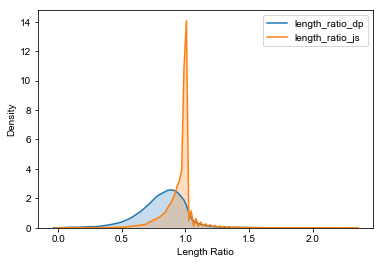

In [28]:
ax = sns.kdeplot(deepspeech_train['length_ratio_dp'], shade=True)
sns.kdeplot(jasper_train['length_ratio_js'], shade=True)

sns.set_style("whitegrid")
ax.set(xlabel='Length Ratio', ylabel='Density')

print('Blue: DeepSpeech')
print('Orange: Jasper')

**b. Dev**

Blue: DeepSpeech
Orange: Jasper


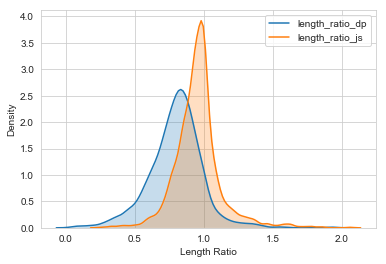

In [29]:
ax = sns.kdeplot(deepspeech_dev['length_ratio_dp'], shade=True)
sns.kdeplot(jasper_dev['length_ratio_js'], shade=True)

sns.set_style("whitegrid")
ax.set(xlabel='Length Ratio', ylabel='Density')

print('Blue: DeepSpeech')
print('Orange: Jasper')

**c. Test**

Blue: DeepSpeech
Orange: Jasper
Green: Kaldi


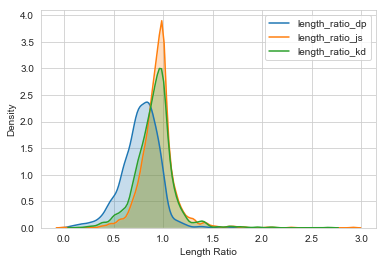

In [30]:
ax = sns.kdeplot(deepspeech_test['length_ratio_dp'], shade=True)
sns.kdeplot(jasper_test['length_ratio_js'], shade=True)
sns.kdeplot(kaldi_test['length_ratio_kd'], shade=True)

sns.set_style("whitegrid")
ax.set(xlabel='Length Ratio', ylabel='Density')

print('Blue: DeepSpeech')
print('Orange: Jasper')
print('Green: Kaldi')

**d. Private Test**

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Length Ratio')]

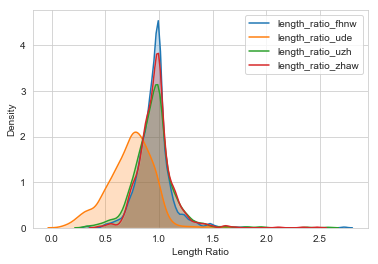

In [31]:
ax = sns.kdeplot(combined_test_pri['length_ratio_fhnw'], shade=True)
sns.kdeplot(combined_test_pri['length_ratio_ude'], shade=True)
sns.kdeplot(combined_test_pri['length_ratio_uzh'], shade=True)
sns.kdeplot(combined_test_pri['length_ratio_zhaw'], shade=True)

sns.set_style("whitegrid")
ax.set(xlabel='Length Ratio', ylabel='Density')

**WER Train**

In [32]:
deepspeech_train_no_issue = deepspeech_train[deepspeech_train['length_ratio_dp'] > 0.75]
jasper_train_no_issue = jasper_train[jasper_train['length_ratio_js'] > 0.75]

In [33]:
#deepspeech
issue_dp = round(deepspeech_train['wer_dp'].mean()*100,2)
no_issue_dp = round(deepspeech_train_no_issue['wer_dp'].mean()*100,2)

#jasper
issue_jp = round(jasper_train['wer_js'].mean()*100,2)
no_issue_jp = round(jasper_train_no_issue['wer_js'].mean()*100,2)

In [34]:
data = [["Issue", issue_dp, issue_jp], ["No Issue", no_issue_dp, no_issue_jp]]
df = pd.DataFrame(data, columns=["Index", "Mozilla", "Jasper"])
df.set_index("Index")

,Mozilla,Jasper
Index,,
Issue,53.82,15.88
No Issue,46.26,13.27


**WER Dev**

In [35]:
deepspeech_dev_no_issue = deepspeech_dev[deepspeech_dev['length_ratio_dp'] > 0.75]
jasper_dev_no_issue = jasper_dev[jasper_dev['length_ratio_js'] > 0.75]

In [36]:
#deepspeech
issue_dp = round(deepspeech_dev['wer_dp'].mean()*100,2)
no_issue_dp = round(deepspeech_dev_no_issue['wer_dp'].mean()*100,2)

#jasper
issue_jp = round(jasper_dev['wer_js'].mean()*100,2)
no_issue_jp = round(jasper_dev_no_issue['wer_js'].mean()*100,2)

In [37]:
data = [["Issue", issue_dp, issue_jp], ["No Issue", no_issue_dp, no_issue_jp]]
df = pd.DataFrame(data, columns=["Index", "Mozilla", "Jasper"])
df.set_index("Index")

,Mozilla,Jasper
Index,,
Issue,57.86,41.30
No Issue,51.00,39.66


**WER Test**

In [38]:
deepspeech_test_no_issue = deepspeech_test[deepspeech_test['length_ratio_dp'] > 0.75]
jasper_test_no_issue = jasper_test[jasper_test['length_ratio_js'] > 0.75]
kaldi_test_no_issue = kaldi_test[kaldi_test['length_ratio_kd'] > 0.75]

In [39]:
#deepspeech
issue_dp = round(deepspeech_test['wer_dp'].mean()*100,2)
no_issue_dp = round(deepspeech_test_no_issue['wer_dp'].mean()*100,2)

#jasper
issue_jp = round(jasper_test['wer_js'].mean()*100,2)
no_issue_jp = round(jasper_test_no_issue['wer_js'].mean()*100,2)

#kaldi
issue_kd = round(kaldi_test['wer_kd'].mean(),2)
no_issue_kd = round(kaldi_test_no_issue['wer_kd'].mean(),2)

In [40]:
data = [["Issue", issue_dp, issue_jp, issue_kd], ["No Issue", no_issue_dp, no_issue_jp, no_issue_kd]]
df = pd.DataFrame(data, columns=["Index", "Mozilla", "Jasper", "Kaldi"])
df.set_index("Index")

,Mozilla,Jasper,Kaldi
Index,,,
Issue,59.68,44.01,47.04
No Issue,51.18,41.90,43.70


**WER Test Private**

In [41]:
fhnw_no_issue = combined_test_pri[combined_test_pri['length_ratio_fhnw'] > 0.75]
ude_pri_no_issue = combined_test_pri[combined_test_pri['length_ratio_ude'] > 0.75]
uzh_no_issue = combined_test_pri[combined_test_pri['length_ratio_uzh'] > 0.75]
zhaw_pri_no_issue = combined_test_pri[combined_test_pri['length_ratio_zhaw'] > 0.75]

In [42]:
#fhnw
issue_fhnw = round(combined_test_pri['res_fhnw_wer'].mean(),2)
no_issue_fhnw = round(fhnw_no_issue['res_fhnw_wer'].mean(),2)

#ude
issue_ude = round(combined_test_pri['res_ude_wer'].mean(),2)
no_issue_ude = round(fhnw_no_issue['res_ude_wer'].mean(),2)

#uzh
issue_uzh = round(combined_test_pri['res_uzh_wer'].mean(),2)
no_issue_uzh = round(fhnw_no_issue['res_uzh_wer'].mean(),2)

#zhaw
issue_zhaw = round(combined_test_pri['res_zhaw_wer'].mean(),2)
no_issue_zhaw = round(fhnw_no_issue['res_zhaw_wer'].mean(),2)

In [43]:
data = [["Issue", issue_fhnw, issue_ude, issue_uzh, issue_zhaw], ["No Issue", no_issue_fhnw, no_issue_ude, no_issue_uzh, no_issue_zhaw]]
df = pd.DataFrame(data, columns=["Index", "FHNW", "UDE", "UZH", "ZHAW"])
df.set_index("Index")

,FHNW,UDE,UZH,ZHAW
Index,,,,
Issue,36.10,58.87,45.38,40.27
No Issue,34.87,57.92,44.86,39.40


**Comparison**

**Length Issue**

Text(0, 0.5, 'WER')

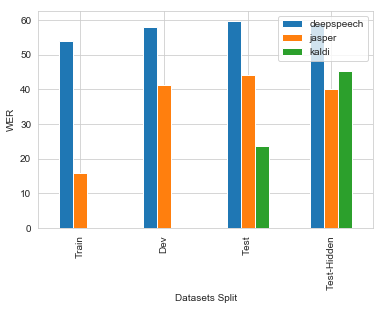

In [44]:
plotdata = pd.DataFrame({
    "deepspeech":[53.8, 57.9, 59.7, 58.9],
    "jasper":[15.9, 41.3, 44.1, 40.2],
    "kaldi":[0, 0, 23.7, 45.4]
    }, 
    index=["Train", "Dev", "Test", "Test-Hidden"]
)
plotdata.plot(kind="bar")
plt.xlabel("Datasets Split")
plt.ylabel("WER")

**No Length Issue**

Text(0, 0.5, 'WER')

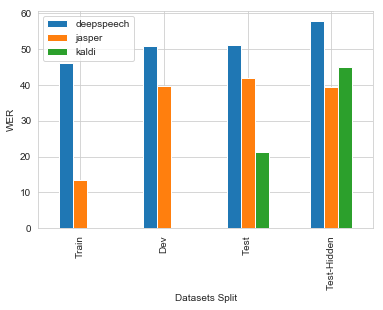

In [45]:
plotdata = pd.DataFrame({
    "deepspeech":[46.2, 51.0, 51.1, 57.9],
    "jasper":[13.3, 39.7, 41.9, 39.4],
    "kaldi":[0, 0, 21.3, 44.9]
    }, 
    index=["Train", "Dev", "Test", "Test-Hidden"]
)
plotdata.plot(kind="bar")
plt.xlabel("Datasets Split")
plt.ylabel("WER")

**Top-X Clips With Difference Greater Than 20 Between DeepSpeech and Jasper**

In [46]:
df_no_issue = ude_pri_no_issue[ude_pri_no_issue['res_ude_wer'] - ude_pri_no_issue['res_zhaw_wer'] > 20][['src','res_ude_wer']].sort_values(['res_ude_wer'], ascending=[False])

In [47]:
df_no_issue.style.set_table_styles([dict(selector="th",props=[('max-width', '50px')])])

,src,res_ude_wer
wav_filename,,
29278.flac,zweitens ist für mich wichtig,140
4488.flac,gerade in diesem fall wäre es wichtig der kanton hätte nach wie vor eine aktienmehrheit,120
36127.flac,des gutachtens häner nachlesen,100
34116.flac,ginge es um effizienz hätten wir super instrumente,100
14698.flac,ich werde diesem kredit mit voller überzeugung zustimmen,100
37312.flac,die letzten kompositionen man konnte es in der motion lesen wurden an die öbb verkauft,86.67
14757.flac,bei selbstständigerwerbenden wird es noch komplizierter,83.33
11649.flac,mein blatt ist inzwischen etwas verkritzelt ich werde ein bisschen abgehackt sprechen,83.33
1481.flac,die wesentliche arbeit des gosteliarchivs besteht dabei aber nicht nur im sichern und verwahren solcher dokumente,81.25


In [48]:
df_no_issue.shape

(151, 2)

**Heat Map**

In [189]:
heatmap_data = combined_results[['wav_filename', 'wer_dp', 'wer_js', 'wer_kd']].dropna().set_index('wav_filename')
heatmap_data['wer_dp'] = round(heatmap_data['wer_dp']*100,2)
heatmap_data['wer_js'] = round(heatmap_data['wer_js']*100,2)
heatmap_data = heatmap_data.rename(columns={'wer_dp': 'deepspeech', 'wer_js': 'jasper', 'wer_kd': 'kaldi'})

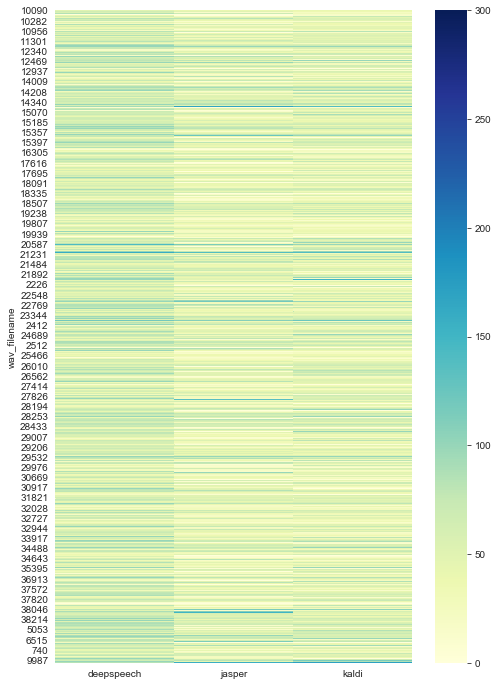

In [197]:
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap_data, cmap="YlGnBu")

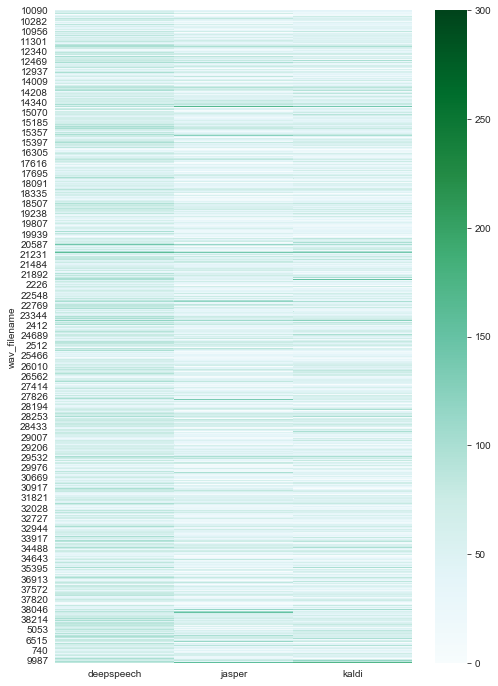

In [194]:
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap_data, cmap="BuGn")

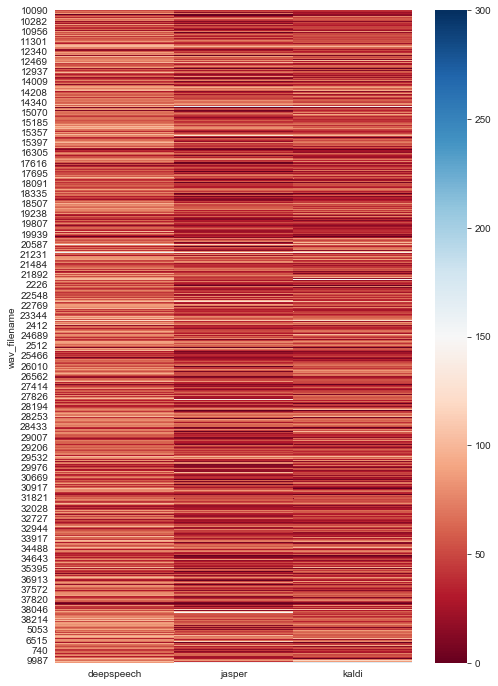

In [192]:
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap_data, cmap="RdBu")